# Introduction

Graph theory is widely used in network analysis, social sciences, biology, and recommendation systems.
- NetworkX is a Python library for creating, manipulating, and studying graph structures
- Pyvis is used for interactive network visualization. https://pyvis.readthedocs.io/en/latest/tutorial.html

# Installation

In [8]:
#!pip install networkx pyvis

# Understanding Graphs

### Graphs consist of nodes (vertices) and edges (connections). There are different types:

- Undirected Graph: Edges have no direction.

- Directed Graph (DiGraph): Edges have a specific direction.

- Weighted Graph: Edges have weights assigned to them.

#  Creating a Basic Graph in NetworkX

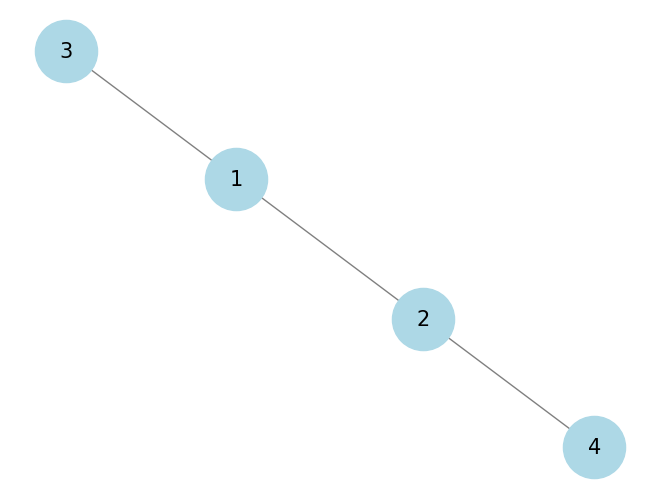

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple undirected graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])  # Adding nodes
G.add_edges_from([(1, 2), (1, 3), (2, 4)])  # Adding edges

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

# Working with Directed and Weighted Graphs

##### Steps
- Create a directed graph (DiGraph).
- Add edges with weights.
- Compute node positions using spring_layout() e.g nx.spring_layout() positions the nodes based on a force-directed algorithm.
- Draw the graph with styling options.
- Create a dictionary of edge weights.
- Display edge weights on the graph.
- Show the final visualization.

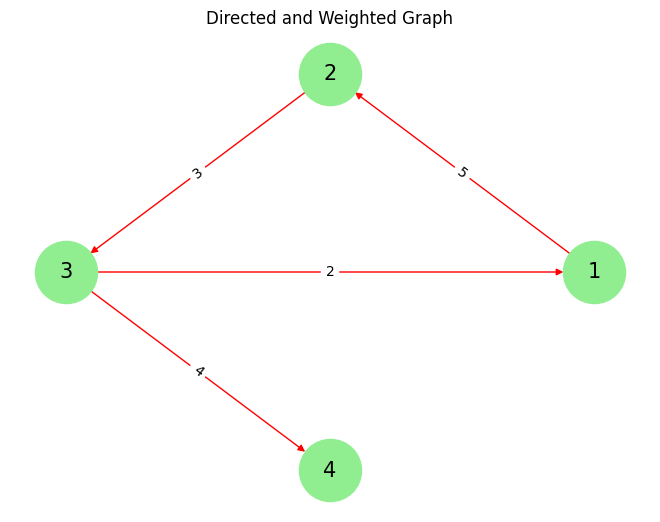

In [38]:
# Creating a directed graph
D = nx.DiGraph()
D.add_weighted_edges_from([(1, 2, 5), (2, 3, 3), (3, 1, 2), (3, 4, 4)])  # (node1, node2, weight)

# Compute node positions using force-directed layout, others  spring_layout, random_layout, spectral_layout
pos = nx.circular_layout(D)

# Draw the graph
nx.draw(D, pos, with_labels=True, node_color='lightgreen', node_size=2000, edge_color='red', font_size=15)


'''
- Create a dictionary of edge labels (weights)
- Iterates over each edge (u, v) and its data d.
- d['weight']: Extracts the weight of the edge.
- {(u, v): d['weight']} creates a dictionary where:Keys are edge tuples (u, v).Values are edge weights.

'''

edge_labels = {(u, v): d['weight'] for u, v, d in D.edges(data=True)}

# Draw edge labels on the graph
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)

# Display the graph
plt.title("Directed and Weighted Graph")
plt.show()

# Graph Properties and Analysis

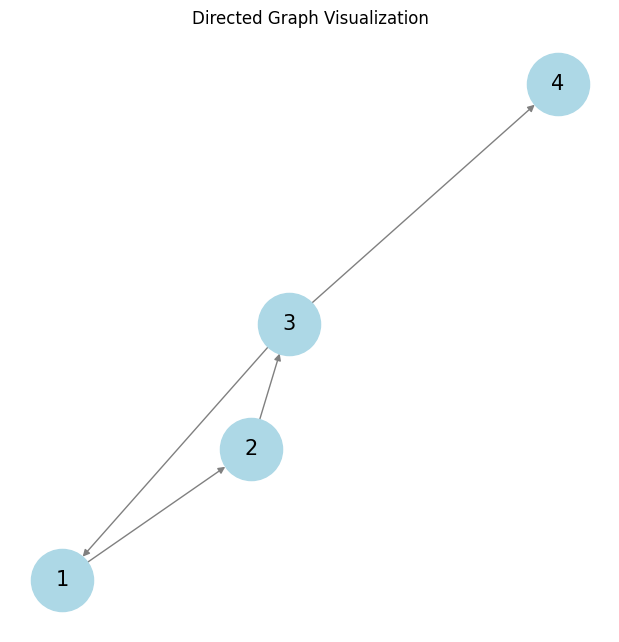

In [31]:
# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4)])

# Compute node positions using force-directed layout
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray', font_size=15, arrows=True)

# Display the graph
plt.title("Directed Graph Visualization")
plt.show()




In [39]:
# Print nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Degree of a node
print("Degree of Node 4:", G.degree(1))  # Number of connections

# Find neighbors of a node
print("Neighbors of Node 2:", list(G.neighbors(2)))

# Finding the shortest path between two nodes
print("Shortest Path (1 to 4):", nx.shortest_path(G, source=1, target=4))

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (2, 3), (3, 1), (3, 4)]
Degree of Node 4: 2
Neighbors of Node 2: [3]
Shortest Path (1 to 4): [1, 2, 3, 4]


# Visualizing Graphs with Pyvis

In [75]:
# Initialize network
net = Network(notebook=True, height="500px", width="100%", directed=True)

# Add nodes with different colors and sizes
net.add_node(1, label="Node 1", color="red", size=25)
net.add_node(2, label="Node 2", color="blue", size=20)
net.add_node(3, label="Node 3", color="green", size=30)
net.add_node(4, label="Node 4", color="purple", size=15)

# Add edges
net.add_edge(1, 2)
net.add_edge(2, 3)
net.add_edge(3, 4)
net.add_edge(4, 1)

# Show the interactive graph
net.show("styled_graph.html")


styled_graph.html


In [76]:
net = Network(notebook=True, height="500px", width="100%", directed=True)

# Add nodes
nodes = [1, 2, 3, 4, 5]
net.add_nodes(nodes, label=[str(n) for n in nodes])

# Add weighted edges
edges = [(1, 2, 5), (2, 3, 3), (3, 4, 7), (4, 5, 2), (5, 1, 4)]
for edge in edges:
    net.add_edge(edge[0], edge[1], value=edge[2], title=f"Weight: {edge[2]}") #value=edge[2] makes edge thickness proportional to weight.

# Show the interactive graph
net.show("weighted_graph.html")


weighted_graph.html


In [50]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 5), (2, 3, 3), (3, 1, 2), (3, 4, 4)])  # (node1, node2, weight)

# Create a Pyvis network
net = Network(notebook=True, height='500px', width='100%', directed=True)

# Convert NetworkX graph to Pyvis
for node in DG.nodes():
    net.add_node(node, label=str(node))  # Adding nodes
for edge in DG.edges():
    net.add_edge(edge[0], edge[1])  # Adding edges

# Save and show the interactive graph
net.show("graph.html")

graph.html


# Understanding Graph Centrality: Degree, Betweenness, and PageRank

- Degree Centrality (Most connected nodes)

- Betweenness Centrality (Nodes controlling information flow)

- Closeness Centrality (Nodes closest to all others)

- Eigenvector Centrality (Influence of a node based on its neighbors)

- PageRank (Used in web search and fraud detection)

In [57]:
import pandas as pd

In [65]:
num_transactions = 50
accounts = list(range(1001, 1020))  # 19 unique accounts

data = []
for _ in range(num_transactions):
    sender = random.choice(accounts)
    receiver = random.choice(accounts)
    amount = round(random.uniform(50, 10000), 2)  # Transaction amounts
    timestamp = pd.Timestamp('2024-03-01') + pd.to_timedelta(random.randint(0, 86400*30), unit='s')
    if sender != receiver:
        data.append([sender, receiver, amount, timestamp])

# Create DataFrame
transactions_df = pd.DataFrame(data, columns=["Sender", "Receiver", "Amount", "Timestamp"])

In [66]:
# Create a directed graph
G = nx.DiGraph()
for _, row in transactions_df.iterrows():
    G.add_edge(row["Sender"], row["Receiver"], weight=row["Amount"])

# Pyvis visualization
net = Network(notebook=True, height='600px', width='100%', directed=True)


for node in G.nodes():
    net.add_node(node, label=str(node))
for u, v, d in G.edges(data=True):
    net.add_edge(u, v, title=f"Weight: {d['weight']}", value=d['weight'])
net.show("graph_visualization.html")

graph_visualization.html


# Degree Centrality (Most Connected Nodes)

In [67]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Visualize with Pyvis
net = Network(notebook=True, height='600px', width='100%', directed=True)
for node in G.nodes():
    color = "red" if degree_centrality[node] > 0.2 else "blue"
    net.add_node(node, label=str(node), color=color)
for u, v in G.edges():
    net.add_edge(u, v)
net.show("degree_centrality.html")

Degree Centrality: {1016: 0.38888888888888884, 1005: 0.2777777777777778, 1018: 0.16666666666666666, 1013: 0.2777777777777778, 1011: 0.2777777777777778, 1002: 0.2222222222222222, 1006: 0.2777777777777778, 1007: 0.5, 1008: 0.5, 1003: 0.16666666666666666, 1012: 0.38888888888888884, 1001: 0.16666666666666666, 1010: 0.3333333333333333, 1015: 0.2222222222222222, 1004: 0.2222222222222222, 1019: 0.2222222222222222, 1009: 0.05555555555555555, 1014: 0.1111111111111111, 1017: 0.1111111111111111}
degree_centrality.html


- Nodes with a high degree centrality are important as they have many connections.

- Red nodes indicate the most connected ones.

# Betweenness Centrality (Control Over Information Flow)

In [69]:
# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness)

# Visualize with Pyvis
net = Network(notebook=True, height='600px', width='100%', directed=True)
for node in G.nodes():
    color = "green" if betweenness[node] > 0.1 else "blue"
    net.add_node(node, label=str(node), color=color)
for u, v in G.edges():
    net.add_edge(u, v)
net.show("betweenness_centrality.html")

Betweenness Centrality: {1016: 0.159041394335512, 1005: 0.10348583877995643, 1018: 0.006535947712418301, 1013: 0.023887332710862123, 1011: 0.06411453470277001, 1002: 0.04995331465919701, 1006: 0.19825708061002176, 1007: 0.29034391534391535, 1008: 0.13589324618736384, 1003: 0.09150326797385622, 1012: 0.12593370681605973, 1001: 0.0457516339869281, 1010: 0.016339869281045753, 1015: 0.05119825708061002, 1004: 0.07282913165266107, 1019: 0.025521319638966696, 1009: 0.0, 1014: 0.003462496109554933, 1017: 0.0}
betweenness_centrality.html


- Nodes with high betweenness centrality act as key intermediaries in the network.

- Green nodes highlight important control points.

# Closeness Centrality (Nodes Closest to Others)

In [70]:
# Compute closeness centrality
closeness = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness)

# Visualize with Pyvis
net = Network(notebook=True, height='600px', width='100%', directed=True)
for node in G.nodes():
    color = "yellow" if closeness[node] > 0.4 else "blue"
    net.add_node(node, label=str(node), color=color)
for u, v in G.edges():
    net.add_edge(u, v)
net.show("closeness_centrality.html")



Closeness Centrality: {1016: 0.3402777777777778, 1005: 0.32996632996632996, 1018: 0.27173913043478265, 1013: 0.5294117647058824, 1011: 0.2222222222222222, 1002: 0.19444444444444445, 1006: 0.2942942942942943, 1007: 0.362962962962963, 1008: 0.32996632996632996, 1003: 0.3402777777777778, 1012: 0.3111111111111111, 1001: 0.16498316498316498, 1010: 0.46153846153846156, 1015: 0.362962962962963, 1004: 0.2222222222222222, 1019: 0.2177777777777778, 1009: 0.0, 1014: 0.2777777777777778, 1017: 0.0}
closeness_centrality.html


- Nodes with high closeness centrality have quick access to all other nodes.
- Yellow nodes indicate those closer to others.

# Eigenvector Centrality (Influence Based on Neighbors)

In [72]:
# Compute eigenvector centrality
eigenvector = nx.eigenvector_centrality(G)
print("Eigenvector Centrality:", eigenvector)

# Visualize with Pyvis
net = Network(notebook=True, height='600px', width='100%', directed=True)
for node in G.nodes():
    color = "purple" if eigenvector[node] > 0.2 else "blue"
    net.add_node(node, label=str(node), color=color)
for u, v in G.edges():
    net.add_edge(u, v)
net.show("eigenvector_centrality.html")

Eigenvector Centrality: {1016: 0.19644460252422505, 1005: 0.2786525922592804, 1018: 0.10455016839435426, 1013: 0.48645958136060446, 1011: 0.10513269549451115, 1002: 0.08925285822631662, 1006: 0.24767484672580276, 1007: 0.36699064968725853, 1008: 0.24629827922082176, 1003: 0.2101788785292575, 1012: 0.21648814366951039, 1001: 0.03788557285488973, 1010: 0.4281681981413196, 1015: 0.21370628092377333, 1004: 0.10513269549451115, 1019: 0.06070773107357842, 1009: 9.363345679675924e-18, 1014: 0.15578041259593198, 1017: 9.363345679675924e-18}
eigenvector_centrality.html


- Nodes with high eigenvector centrality are influential because they connect to other important nodes.
- Purple nodes indicate these high-impact nodes.

# PageRank (Importance Based on Links)

In [77]:
# Compute PageRank
pagerank = nx.pagerank(G)
print("PageRank Scores:", pagerank)

# Visualize with Pyvis
net = Network(notebook=True, height='600px', width='100%', directed=True)
for node in G.nodes():
    color = "orange" if pagerank[node] > 0.1 else "blue"
    net.add_node(node, label=str(node), color=color)
for u, v in G.edges():
    net.add_edge(u, v)
net.show("pagerank.html")

PageRank Scores: {1016: 0.025334789302616918, 1005: 0.04980239515676552, 1018: 0.014555677394625635, 1013: 0.2548410404272526, 1011: 0.01926530134074402, 1002: 0.019308738458611002, 1006: 0.034143742312706435, 1007: 0.07814979069609038, 1008: 0.022785261775400207, 1003: 0.05466653010969197, 1012: 0.03521925283348947, 1001: 0.022426080629550406, 1010: 0.25957577581384866, 1015: 0.033988188823317174, 1004: 0.017198493710612998, 1019: 0.019148007398981055, 1009: 0.007894736842105263, 1014: 0.023801460131485017, 1017: 0.007894736842105263}
pagerank.html


- Google's PageRank algorithm ranks web pages based on incoming links.
- Orange nodes indicate the most important nodes based on incoming links.